In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv(r"C:\Users\ASISH\Downloads\Titanic-Dataset.csv")

In [3]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset['family_member']=1+dataset['Parch']+dataset['SibSp']
dataset.groupby(['family_member'],as_index=False)['Survived'].agg(['count','mean'])

,family_member,count,mean
0,1,537,0.303538
1,2,161,0.552795
2,3,102,0.578431
3,4,29,0.724138
4,5,15,0.200000
5,6,22,0.136364
6,7,12,0.333333
7,8,6,0.000000
8,11,7,0.000000


In [7]:
conditions = [
    dataset['family_member']==1,                 
    (dataset['family_member']>1)&(dataset['family_member']<=3),  
    (dataset['family_member']>3)&(dataset['family_member']<=6),
    (dataset['family_member']>6)&(dataset['family_member']<=11)
]
choices=['solo','small','big','toobig']
dataset['family_types']=np.select(conditions,choices)
dataset.groupby(['family_types'],as_index=False)['Survived'].agg(['count','mean'])

,family_types,count,mean
0,big,66,0.409091
1,small,263,0.562738
2,solo,537,0.303538
3,toobig,25,0.160000


In [8]:
dataset['Age']=dataset.groupby(['Sex','Pclass','Survived'])['Age'].transform(lambda x:x.fillna(x.median()))

In [9]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_member,family_types
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,solo


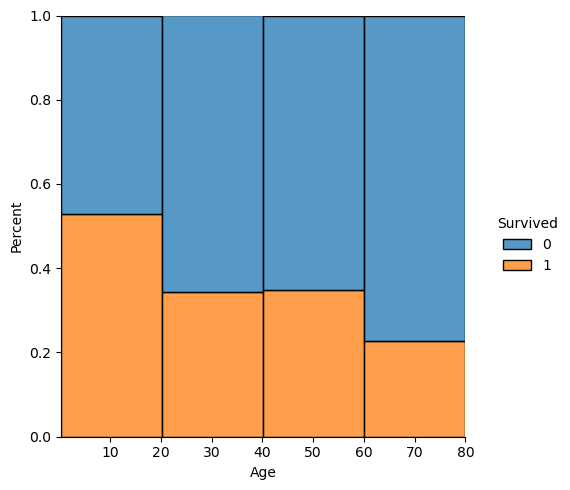

In [10]:
sns.displot(data=dataset,x='Age',hue='Survived',binwidth=18,height=5,multiple='fill',stat='percent')

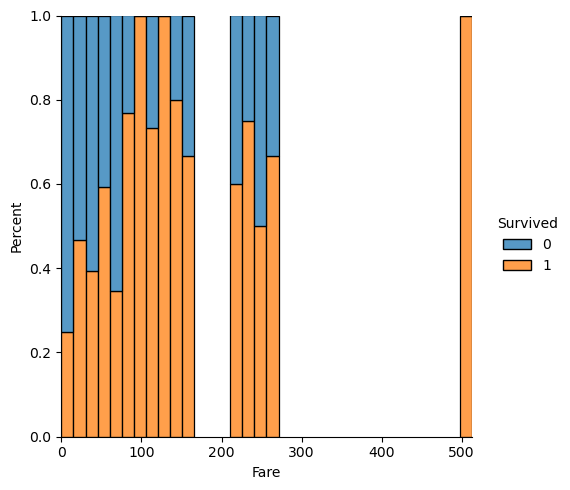

In [11]:
sns.displot(data=dataset,x='Fare',hue='Survived',binwidth=15,height=5,multiple='fill',stat='percent')

In [12]:
dataset['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
conditions = [                
     dataset['Fare']<=7.910400,  
    (dataset['Fare']>7.910400)&(dataset['Fare']<=31.000000),
    (dataset['Fare']>31.000000)&(dataset['Fare']<=512.329200)
]
choices=['low','medium','High']
dataset['Fare']=np.select(conditions,choices)
dataset.groupby(['Fare'],as_index=False)['Survived'].agg(['count','mean'])
    

,Fare,count,mean
0,High,222,0.581081
1,low,223,0.197309
2,medium,446,0.378924


In [14]:
dataset['Age'].describe()

count    891.000000
mean      29.071459
std       13.488772
min        0.420000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
conditions = [                
     dataset['Age']<=18,  
    (dataset['Age']>18)&(dataset['Age']<=60),
    (dataset['Age']>60)&(dataset['Age']<=80)
]
choices=['low','medium','High']
dataset['Age']=np.select(conditions,choices)
dataset.groupby(['Age'],as_index=False)['Survived'].agg(['count','mean'])
    

,Age,count,mean
0,High,22,0.227273
1,low,141,0.510638
2,medium,728,0.364011


In [16]:
dataset['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [17]:
dataset['Name']=dataset['Name'].str.split(pat=",",expand=True)[1].str.split(pat=".",expand=True)[0].apply(lambda x: x.strip())

In [18]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_member,family_types
0,1,0,3,Mr,male,medium,1,0,A/5 21171,low,NaN,S,2,small
1,2,1,1,Mrs,female,medium,1,0,PC 17599,High,C85,C,2,small
2,3,1,3,Miss,female,medium,0,0,STON/O2. 3101282,medium,NaN,S,1,solo
3,4,1,1,Mrs,female,medium,1,0,113803,High,C123,S,2,small
4,5,0,3,Mr,male,medium,0,0,373450,medium,NaN,S,1,solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,medium,0,0,211536,medium,NaN,S,1,solo
887,888,1,1,Miss,female,medium,0,0,112053,medium,B42,S,1,solo
888,889,0,3,Miss,female,medium,1,2,W./C. 6607,medium,NaN,S,4,big
889,890,1,1,Mr,male,medium,0,0,111369,medium,C148,C,1,solo


In [19]:
dataset['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [20]:
dataset['Name']=dataset['Name'].replace(['Mrs','Mme'],'Mrs')
dataset['Name']=dataset['Name'].replace(['Mr','Sir'],'Mr')
dataset['Name']=dataset['Name'].replace(['Lady','the Contess','Master','Don','Jonkheer'],'VIPs')
dataset['Name']=dataset['Name'].replace(['Miss','Ms','Mlle'],'Miss')
dataset['Name']=dataset['Name'].replace(['capt','col','Major','Rev','Dr'],'Officers')

In [21]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_member,family_types
0,1,0,3,Mr,male,medium,1,0,A/5 21171,low,NaN,S,2,small
1,2,1,1,Mrs,female,medium,1,0,PC 17599,High,C85,C,2,small
2,3,1,3,Miss,female,medium,0,0,STON/O2. 3101282,medium,NaN,S,1,solo
3,4,1,1,Mrs,female,medium,1,0,113803,High,C123,S,2,small
4,5,0,3,Mr,male,medium,0,0,373450,medium,NaN,S,1,solo


In [22]:
dataset.dropna(subset=['Embarked'],inplace=True)

In [23]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family_member',
       'family_types'],
      dtype='object')

In [24]:
dataset.drop(['PassengerId','SibSp','Cabin','Ticket','Parch','family_member'],inplace=True,axis=1)

In [25]:
dataset.head(5)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_types
0,0,3,Mr,male,medium,low,S,small
1,1,1,Mrs,female,medium,High,C,small
2,1,3,Miss,female,medium,medium,S,solo
3,1,1,Mrs,female,medium,High,S,small
4,0,3,Mr,male,medium,medium,S,solo


In [26]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
dataset["Sex"]=lr.fit_transform(dataset['Sex'])
dataset["Embarked"]=lr.fit_transform(dataset['Embarked'])
dataset["Name"]=lr.fit_transform(dataset['Name'])
dataset["Age"]=lr.fit_transform(dataset['Age'])
dataset["Fare"]=lr.fit_transform(dataset['Fare'])
dataset["family_types"]=lr.fit_transform(dataset['family_types'])

In [27]:
dataset

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_types
0,0,3,3,1,2,1,2,1
1,1,1,4,0,2,0,0,1
2,1,3,2,0,2,2,2,2
3,1,1,4,0,2,0,2,1
4,0,3,3,1,2,2,2,2
...,...,...,...,...,...,...,...,...
886,0,2,5,1,2,2,2,2
887,1,1,2,0,2,2,2,2
888,0,3,2,0,2,2,2,0
889,1,1,3,1,2,2,0,2


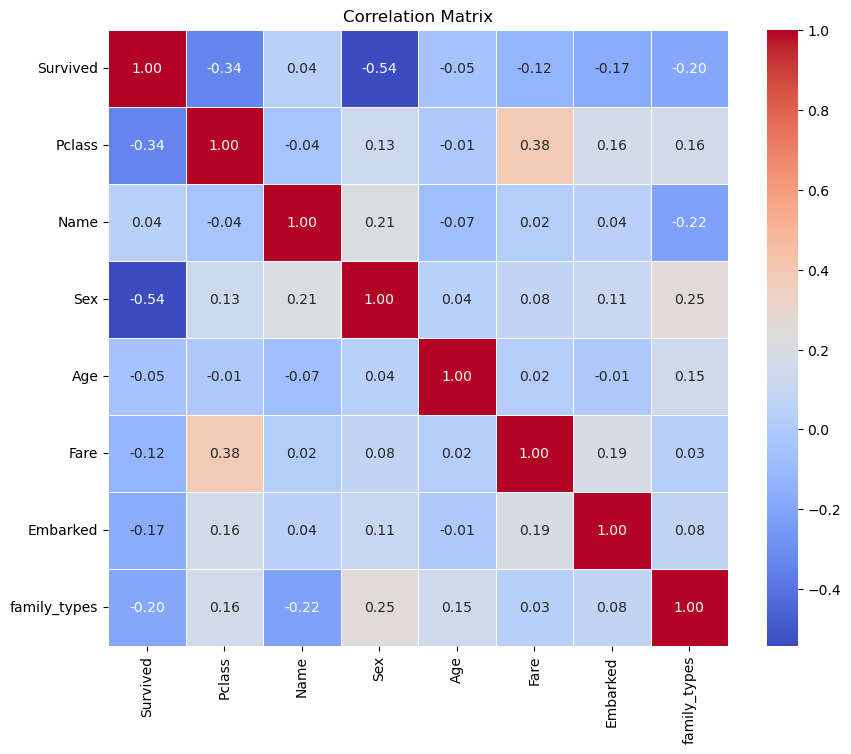

In [28]:
corr_matrix = dataset.corr(numeric_only=True)  
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [29]:
dataset_df=dataset[[ 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
        'Fare',  'Embarked',
       'family_types']]

In [30]:
input_data = dataset_df.iloc[:,+1:]
output_data = dataset_df['Survived']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=45)

In [70]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier( max_depth=10,n_estimators=200 )
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7921348314606742

In [33]:
# for i in range (1,50):
#     for j in range(10, 201, 50):
#         dt=RandomForestClassifier(max_depth=i,n_estimators=j)
#         dt.fit(x_train,y_train)
#         print(dt.score(x_test,y_test),dt.score(x_train,y_train),i,j)

0.7528089887640449 0.7482419127988749 1 10
0.7696629213483146 0.7735583684950773 1 60
0.7808988764044944 0.7834036568213784 1 110
0.7752808988764045 0.7834036568213784 1 160
0.7696629213483146 0.7819971870604782 2 10
0.7696629213483146 0.8002812939521801 2 60
0.7696629213483146 0.8073136427566807 2 110
0.7696629213483146 0.8016877637130801 2 160
0.7808988764044944 0.8396624472573839 3 10
0.7752808988764045 0.8185654008438819 3 60
0.7752808988764045 0.8227848101265823 3 110
0.7808988764044944 0.8312236286919831 3 160
0.8089887640449438 0.8382559774964838 4 10
0.7865168539325843 0.8424753867791842 4 60
0.7808988764044944 0.8368495077355836 4 110
0.7808988764044944 0.8382559774964838 4 160
0.8033707865168539 0.8354430379746836 5 10
0.8033707865168539 0.8424753867791842 5 60
0.7921348314606742 0.8466947960618847 5 110
0.7808988764044944 0.8481012658227848 5 160
0.7921348314606742 0.8509142053445851 6 10
0.7921348314606742 0.8523206751054853 6 60
0.7921348314606742 0.8537271448663853 6 110
